In [2]:
from libpysal import weights, examples
from contextily import add_basemap
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import geopandas
import pandas as pd



<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [6]:
map_gpkg = geopandas.read_file("data/2019_tramer_pm2-5_mapa_qualitat_aire_bcn.gpkg")
trams = pd.read_csv('data/BCN_GrafVial_CSV/BCN_GrafVial_Trams_ETRS89_CSV.csv',sep=';', encoding='latin-1')
edges=trams[['C_Nus_I', 'C_Nus_F', 'C_Tram']]
nodes = pd.read_csv('data/BCN_GrafVial_CSV/BCN_GrafVial_Nodes_ETRS89_CSV.csv',sep=';', encoding='latin-1')
coords = list(zip(nodes.Coord_X,nodes.Coord_Y))
positions = dict(zip(nodes.FID, coords))
nodes_id = nodes[['FID', 'C_Nus']]
edges = edges.merge(nodes_id, left_on='C_Nus_I', right_on='C_Nus')
edges = edges.merge(nodes_id, left_on='C_Nus_F', right_on='C_Nus')
edges = edges.merge(map_gpkg, left_on='C_Tram', right_on='TRAM')
edges = edges[['FID_x', 'FID_y', 'Rang']]
edges.Rang = edges.Rang.map({'15 - 20 µg/m³':15, '10 - 15 µg/m³':10, '> 25 µg/m³':25, '20 - 25 µg/m³':20})
G = nx.Graph()

for i, edge in edges.iterrows():
    G.add_edge(edge['FID_x'], edge['FID_y'], weight=edge['Rang'])
    

In [7]:
print(positions)

{0: (432108.315, 4581042.075), 1: (432149.471, 4581053.136), 2: (432163.827, 4581056.757), 3: (432178.516, 4581061.643), 4: (432193.211, 4581064.493), 5: (432207.582, 4581068.826), 6: (432222.091, 4581072.443), 7: (432236.458, 4581076.573), 8: (432250.46, 4581080.252), 9: (432265.085, 4581084.58), 10: (432279.403, 4581088.761), 11: (432293.61, 4581092.538), 12: (432308.498, 4581097.267), 13: (432322.545, 4581100.691), 14: (432337.414, 4581104.555), 15: (432351.576, 4581108.588), 16: (432138.756, 4580935.758), 17: (432180.317, 4580947.44), 18: (432194.335, 4580951.882), 19: (432209.06, 4580956.105), 20: (432223.482, 4580960.437), 21: (432238.208, 4580964.712), 22: (432252.361, 4580968.337), 23: (432266.38, 4580972.83), 24: (432281.005, 4580977.158), 25: (432295.205, 4580980.579), 26: (432309.274, 4580985.02), 27: (432323.738, 4580988.944), 28: (432337.542, 4580992.88), 29: (432351.748, 4581001.289), 30: (432362.309, 4581012.674), 31: (432161.701, 4580855.446), 32: (432203.475, 4580866.9

In [5]:
edges

FID_x  FID_y  Rang
0          0      1    15
1         54      1    15
2          0     16    15
3          1      2    15
4       8189      2    15
...      ...    ...   ...
14679   3182   8972    10
14680   9459   9460    15
14681   9462   9460    15
14682   9464   9209    10
14683   9465   3196    10

[14684 rows x 3 columns]

In [8]:
print(type(positions))
import pickle
with open('positions.pkl', 'wb') as f:
    pickle.dump(positions, f)

<class 'dict'>


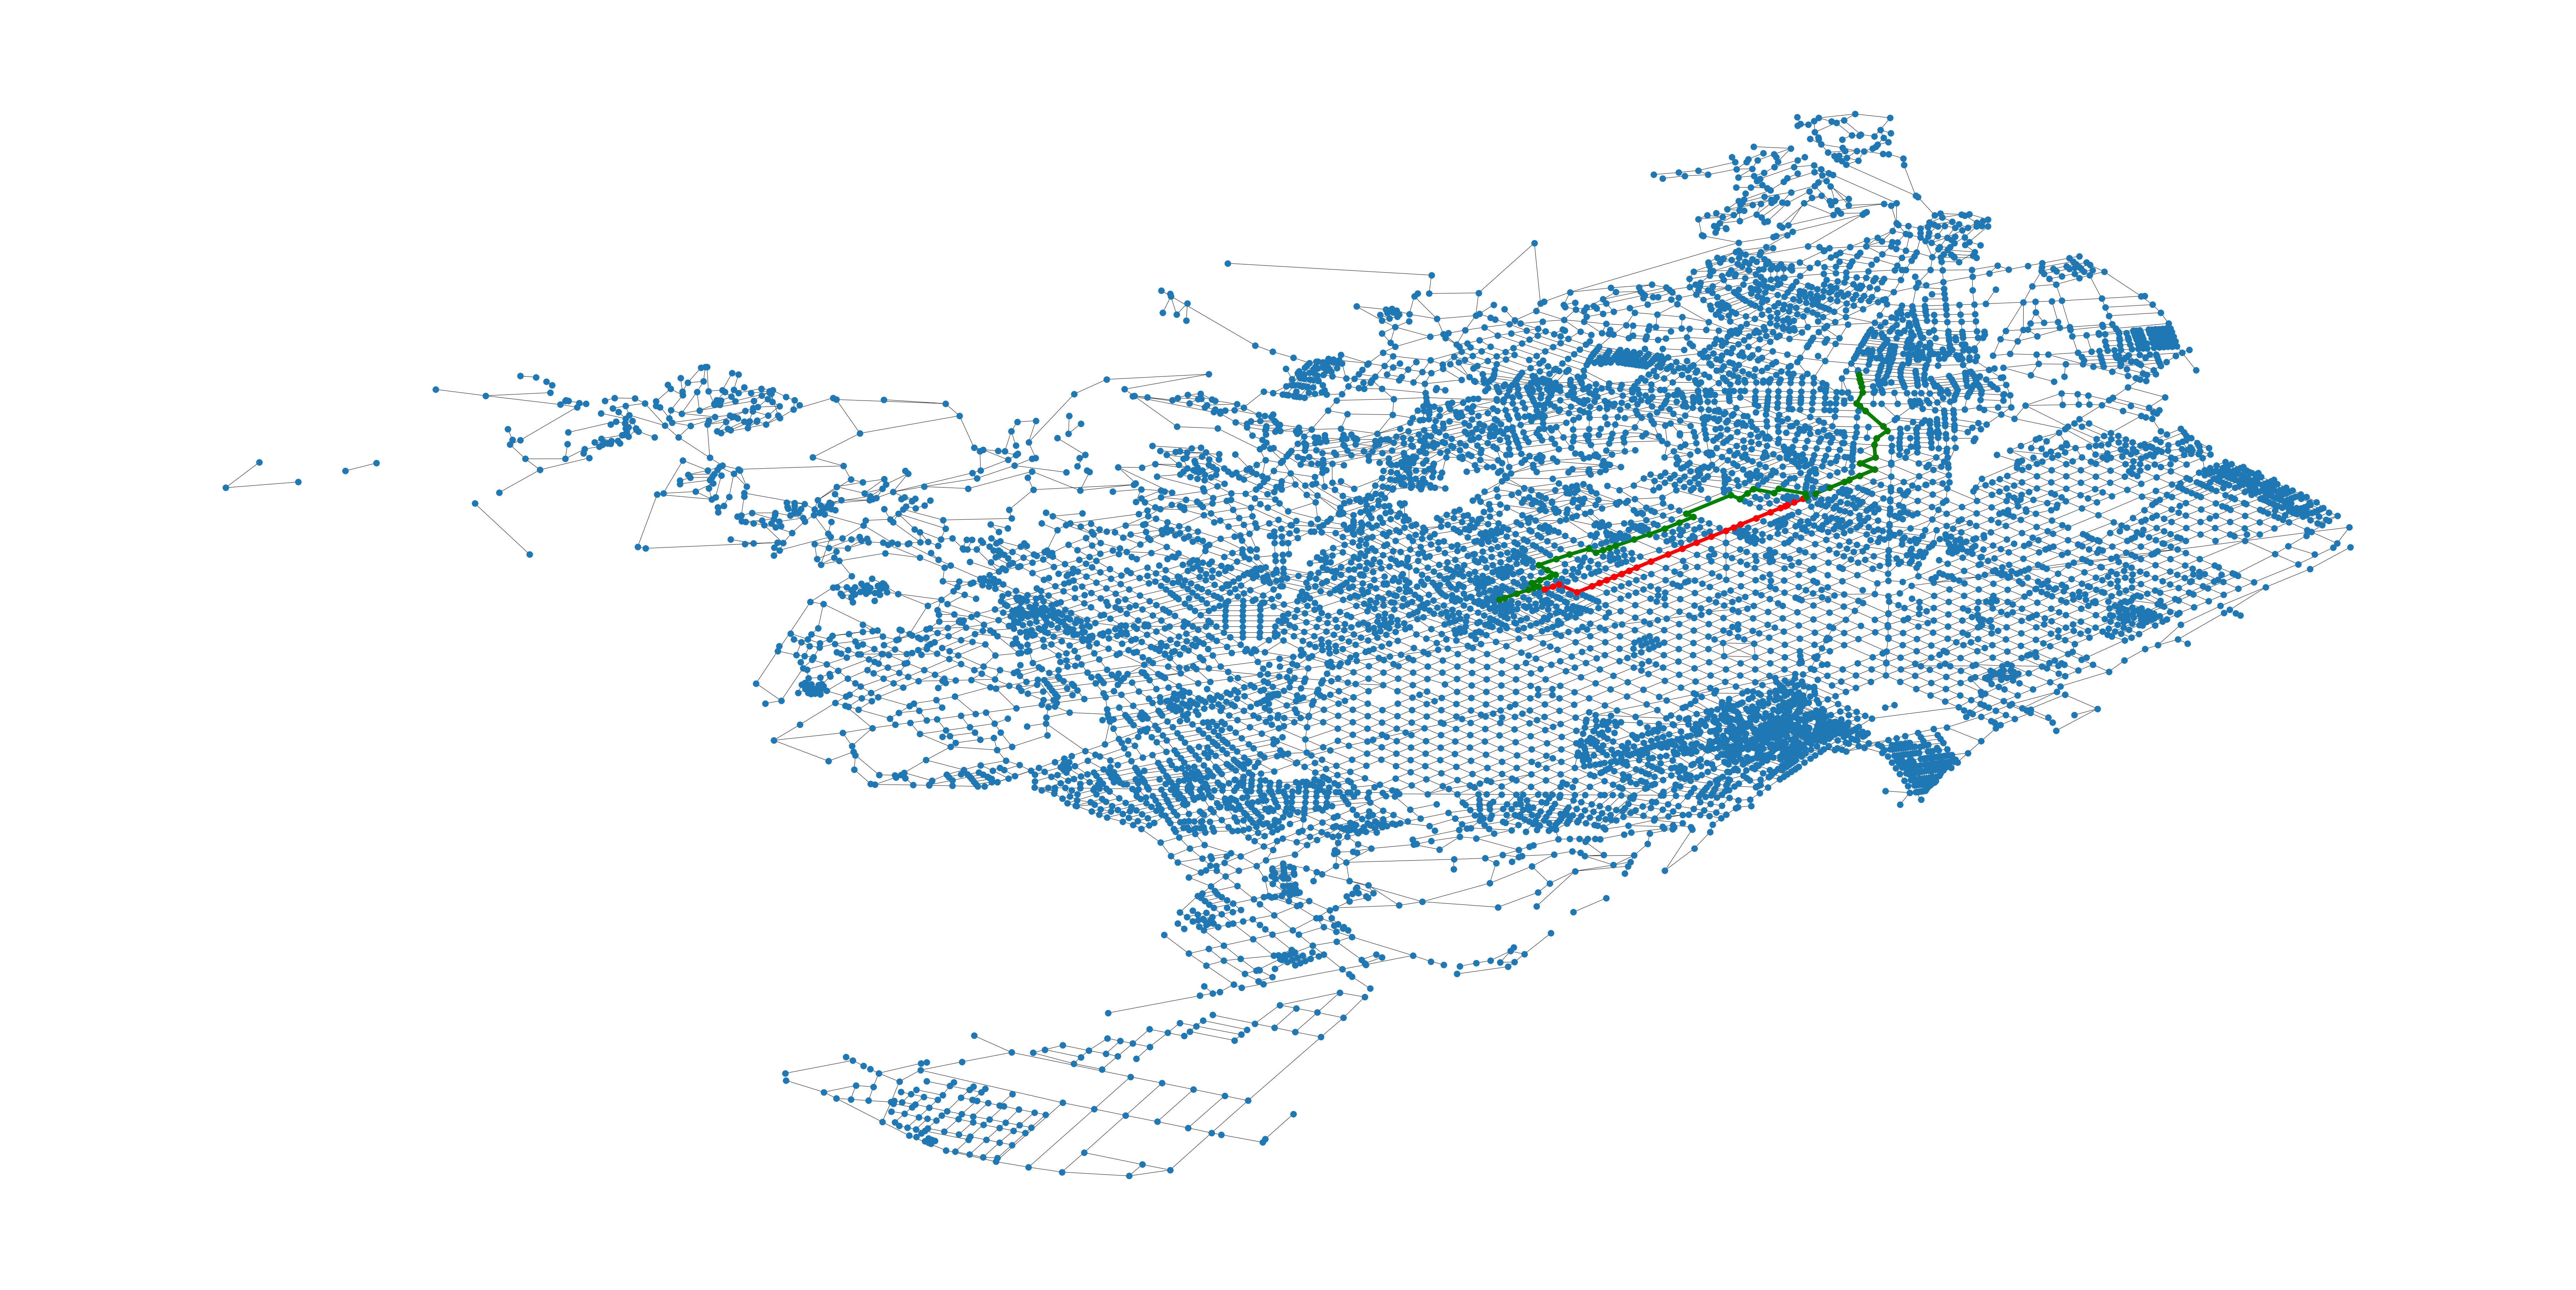

In [3]:
from_node = 3400
to_node = 4300


path_w = nx.shortest_path(G,from_node,to_node, 'weight')
path = nx.shortest_path(G,from_node,to_node)

path_edges = list(zip(path,path[1:]))
path_edges_w = list(zip(path_w,path_w[1:]))


plt.figure(figsize=[100,50])
nx.draw(G, pos=positions)
nx.draw_networkx_nodes(G,positions,nodelist=path,node_color='r')
nx.draw_networkx_edges(G,positions,edgelist=path_edges,edge_color='r',width=10)

nx.draw_networkx_nodes(G,positions,nodelist=path_w,node_color='g')
nx.draw_networkx_edges(G,positions,edgelist=path_edges_w,edge_color='g',width=10)

plt.show()

Weights: 
[3400, 3398, 3392, 3391, 3423, 3345, 3344, 3336, 3329, 3353, 3275, 3243, 3219, 3218, 3211, 3210, 3209, 3208, 3207, 3836, 2668, 2665, 2419, 2380, 2389, 2384, 2378, 8990, 2340, 2335, 2334, 2333, 2332, 2353, 2352, 4661, 4660, 4659, 4646, 4473, 4472, 4471, 4493, 4362, 4361, 4360, 4351, 4355, 4354, 4353, 4352, 4301, 4300]
Cost:  740
---------------
No weights: 
[3400, 3398, 3392, 3391, 3423, 3345, 3344, 3336, 3329, 3353, 3275, 3243, 3219, 3218, 3211, 3210, 3209, 3208, 3207, 3836, 2668, 2392, 2391, 2385, 2390, 2351, 2350, 2349, 1522, 1532, 1463, 1462, 1461, 1460, 1459, 1435, 4641, 4640, 4626, 4627, 4624, 4623, 4611, 4609, 4494, 4332, 4331, 4355, 4354, 4353, 4352, 4301, 4300]
Cost:  52


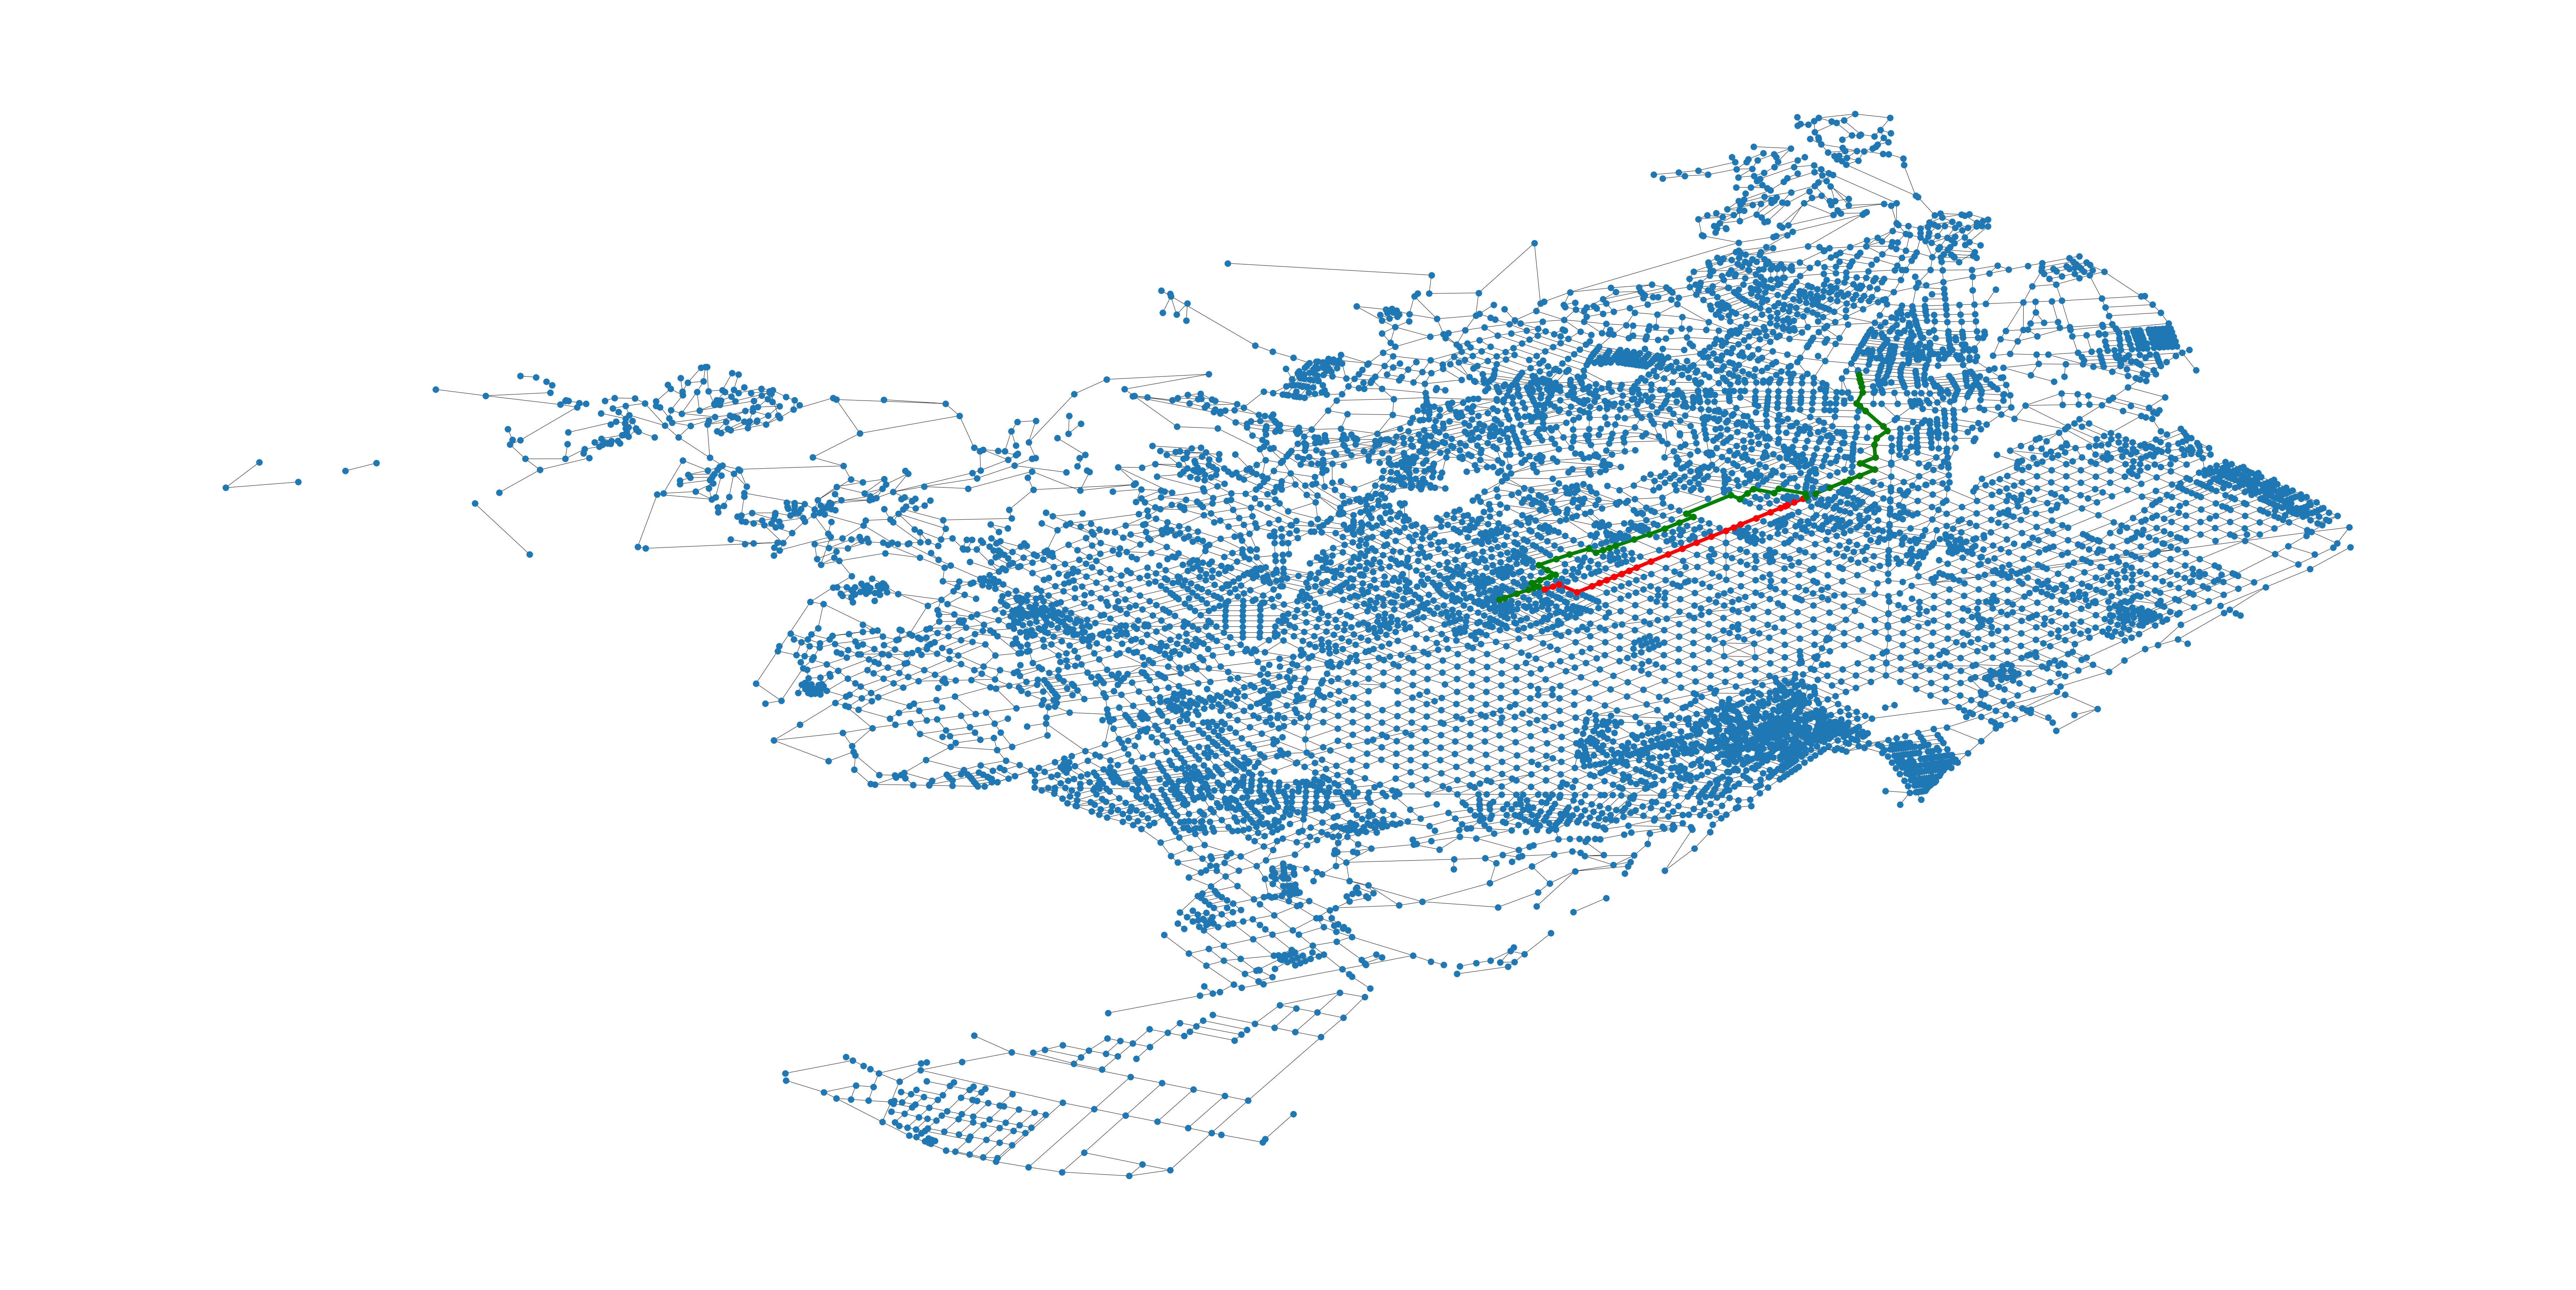

In [12]:
from_node = 3400
to_node = 4300


cost_w, path_w = nx.bidirectional_dijkstra(G,from_node,to_node, 'weight')
cost, path = nx.bidirectional_dijkstra(G,from_node,to_node, 1)

print('Weights: ')
print(path_w)
print('Cost: ', cost_w)
print('---------------')
print('No weights: ', )
print(path)
print('Cost: ', cost)

path_edges = list(zip(path,path[1:]))
path_edges_w = list(zip(path_w,path_w[1:]))


plt.figure(figsize=[100,50])
nx.draw(G, pos=positions)
nx.draw_networkx_nodes(G,positions,nodelist=path,node_color='r')
nx.draw_networkx_edges(G,positions,edgelist=path_edges,edge_color='r',width=10)

nx.draw_networkx_nodes(G,positions,nodelist=path_w,node_color='g')
nx.draw_networkx_edges(G,positions,edgelist=path_edges_w,edge_color='g',width=10)

plt.show()

## Mix